In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("../data/preprocessed_data.csv")
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length
0,22,1514614.0,156908.0,696.438236,35313,1958,1,2,1,34
1,20,2381688.0,146739.0,1095.129578,16549,566,1,0,1,60
2,24,2038853.0,353787.0,937.489807,40221,4918,3,0,1,53
3,10,496771.0,23251.0,228.421445,7647,5088,1,1,1,56
4,26,1123889.0,45802.0,516.778052,2196,4004,1,0,1,55


In [106]:
df['view_count'] = df.apply(lambda row: np.log2(row['view_count']) if row['view_count'] != 0 else row['view_count'], axis=1)
df['dislikes'] = df.apply(lambda row: np.log2(row['dislikes']) if row['dislikes'] != 0 else row['dislikes'], axis=1)
df['comment_count'] = df.apply(lambda row: np.log2(row['comment_count']) if row['comment_count'] != 0 else row['comment_count'], axis=1)
df['likes'] = df.apply(lambda row: np.log2(row['likes']) if row['likes'] != 0 else row['likes'], axis=1)
df['days_uploaded'] = df.apply(lambda row: np.log2(row['days_uploaded']) if row['days_uploaded'] != 0 else row['days_uploaded'], axis=1)
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length
0,22,20.530519,17.259559,9.443852,15.107912,1958,1,2,0.0,34
1,20,21.183553,17.162893,10.096886,14.014456,566,1,0,0.0,60
2,24,20.959326,18.432522,9.872659,15.295661,4918,3,0,0.0,53
3,10,18.922221,14.505005,7.835554,12.900678,5088,1,1,0.0,56
4,26,20.100068,15.483123,9.013401,11.100662,4004,1,0,0.0,55


In [107]:
features = ['categoryId', 'view_count', 'dislikes', 'comment_count', 'image_popularity', 'days_uploaded', 'text_popularity', 'title_length']
target = 'likes'

In [108]:
X = df[features]
X

,categoryId,view_count,dislikes,comment_count,image_popularity,days_uploaded,text_popularity,title_length
0,22,20.530519,9.443852,15.107912,1,0.000000,2,34
1,20,21.183553,10.096886,14.014456,1,0.000000,0,60
2,24,20.959326,9.872659,15.295661,3,0.000000,0,53
3,10,18.922221,7.835554,12.900678,1,0.000000,1,56
4,26,20.100068,9.013401,11.100662,1,0.000000,0,55
...,...,...,...,...,...,...,...,...
245898,23,19.103856,8.017189,10.831307,1,2.807355,1,34
245899,20,21.218798,10.132131,12.508785,1,2.807355,2,40
245900,17,18.855541,6.518421,8.422065,2,2.584963,3,81
245901,24,19.617442,8.530775,10.945444,1,2.584963,2,47


In [109]:
y = df[target]
y

0         17.259559
1         17.162893
2         18.432522
3         14.505005
4         15.483123
            ...    
245898    16.072572
245899    16.800205
245900    12.484319
245901    14.850382
245902    15.707009
Name: likes, Length: 245903, dtype: float64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196722, 8), (49181, 8), (196722,), (49181,))

In [129]:
model = XGBRegressor(n_estimators = 10000, max_depth = 6, learning_rate = 0.01, colsample_bytree = 0.5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [130]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([16.916517, 17.333183, 18.509   , ..., 16.172606, 15.155569,
        14.820071], dtype=float32),
 array([14.355557, 15.085195, 14.785142, ..., 12.290764, 15.073543,
        15.024463], dtype=float32))

In [131]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSE = 0.40412671395427463
Test RMSE = 0.4241601624393995


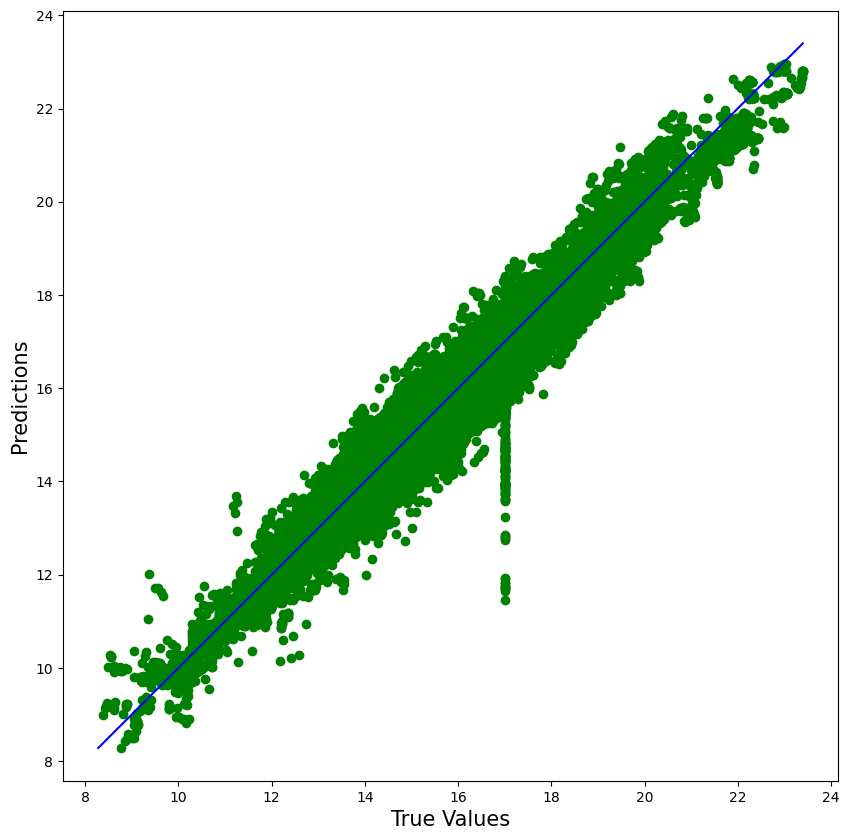

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()